**단계 1:** 보스턴 집값 데이터의 이상치 예측 (그래프 파악)

In [1]:
# 보스턴 집값 데이터를 분석하는데 필요한 패키지를 로드합니다.

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
# 데이터 로드
boston = load_boston()

# Feature와 Target 확인
x = boston.data
y = boston.target

# 딕셔너리 키 탐색
print(         )

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# Feature의 이름 확인

columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
# 데이터셋 속성 출력

print(boston.    )

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# 데이터 프레임 생성 및 데이터셋 크기 확인

boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df_o = boston_df
boston_df.shape

(506, 13)

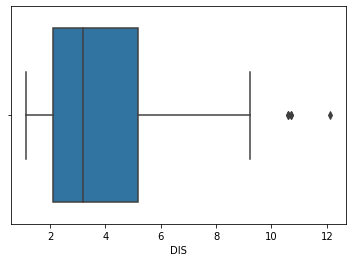

In [6]:
# 이상치 탐색을 위한 단계 
# Boxplot 그리기

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=boston_df[   ])

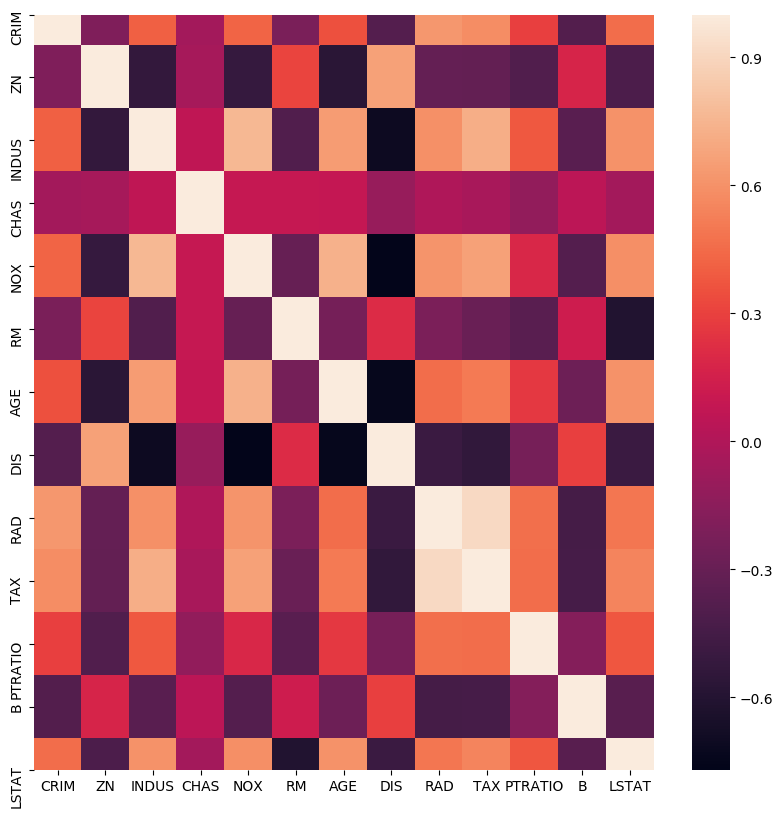

In [7]:
# 상관관계를 Heatmap을 사용하여 표현
# seabons.headmap (출력의 대상이 되는 데이터)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(        )

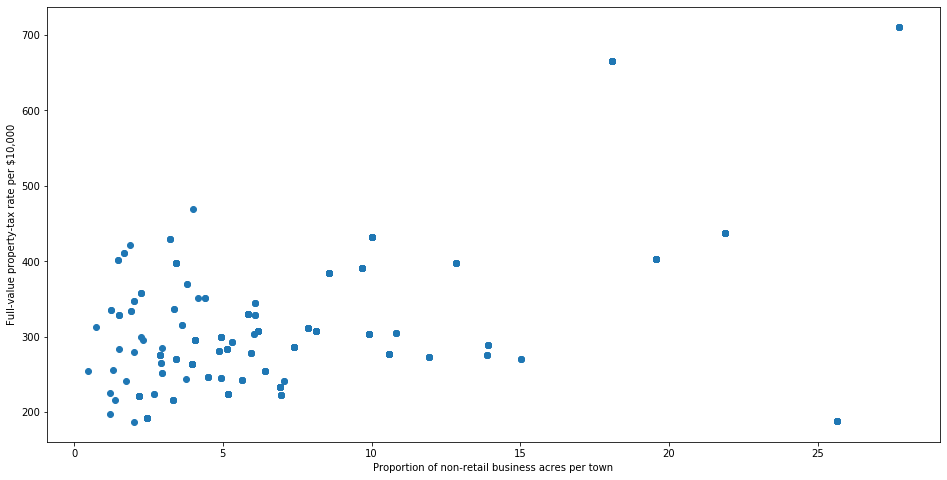

In [8]:
# 산점도를 활용하여 이상치 관측
# matplotlib.scatter (x축 데이터, y축 데이터)

fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(boston_df[    ], boston_df[   ])
ax.set_xlabel(                         )
ax.set_ylabel(                         )
plt.show()

**단계 2:** 보스턴 집값 데이터의 이상치 예측 (수치적 파악)

In [9]:
# Numpy를 사용하여 Z-스코어를 계산하기 위해서 함수 사용
# Scipy.zscore(data)

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(   ))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [10]:
# 표준 점수의 값 (threshold, 임계값)
# 임계값을 비교하는 조건을 사용하여 이상치 파악 가능
# numpy.where (조건)

threshold=3
print(np.where(  ))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [11]:
# 이상치를 포함하고 있는 데이터 크기

boston_df.shape

(506, 13)

In [12]:
# Z-score를 통해 이상치를 제거한 데이터 크기

boston_df_o = boston_df_o[(z < 3).all(axis=1)]
boston_df_o.shape

(415, 13)

In [13]:
# QR(InterQuartile Range, Q3-Q1, 사분위 범위) 를 이용하여 이상치 탐지는 다음과 같습니다.
# Q1, Q3를 계산하고, IQR (InterQuartile Range, Q3-Q1, 사분위 범위)를 계산
# Inner fence (Q1-1.5*IQR)를 계산하여 이상치 제거
# https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png

boston_df_o1 = boston_df

Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [14]:
boston_df_out.shape

(274, 13)

In [15]:
# 이상치 제거의 대상이 되는 범위를 직접 명시

boston_df_out = boston_df_out[boston_df_out['CRIM'].between(-2,2)]

In [16]:
boston_df_out.shape

(230, 13)